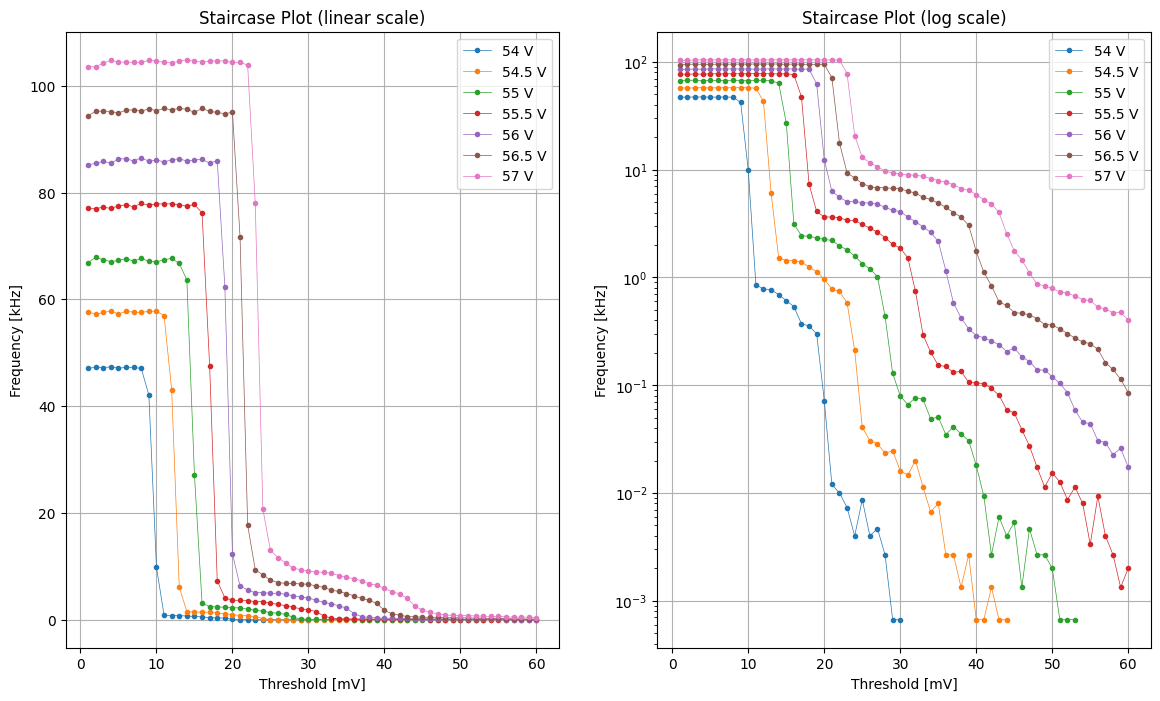

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Staircase3.CSV', sep=';')

thr = np.array(data['Thr mV'])*(-1) # absolute value
Vb_54 = np.array(data['54 V'])
Vb_54_5 = np.array(data['54.5 V'])
Vb_55 = np.array(data['55 V'])
Vb_55_5 = np.array(data['55.5 V'])
Vb_56 = np.array(data['56 V'])
Vb_56_5 = np.array(data['56.5 V'])
Vb_57 = np.array(data['57 V'])

fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].plot(thr, Vb_54, marker='.', label='54 V', linewidth=0.5)
ax[0].plot(thr, Vb_54_5, marker='.', label='54.5 V', linewidth=0.5)
ax[0].plot(thr, Vb_55, marker='.', label = '55 V', linewidth=0.5)
ax[0].plot(thr, Vb_55_5, marker='.', label = '55.5 V', linewidth=0.5)
ax[0].plot(thr, Vb_56, marker='.', label = '56 V', linewidth=0.5)
ax[0].plot(thr, Vb_56_5, marker='.', label = '56.5 V', linewidth=0.5)
ax[0].plot(thr, Vb_57, marker='.', label = '57 V', linewidth=0.5)
ax[0].set_xlabel('Threshold [mV]')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_title('Staircase Plot (linear scale)')
ax[0].grid()
ax[0].legend()

ax[1].plot(thr, Vb_54, marker='.', label='54 V', linewidth=0.5)
ax[1].plot(thr, Vb_54_5, marker='.', label='54.5 V', linewidth=0.5)
ax[1].plot(thr, Vb_55, marker='.', label = '55 V', linewidth=0.5)
ax[1].plot(thr, Vb_55_5, marker='.', label = '55.5 V', linewidth=0.5)
ax[1].plot(thr, Vb_56, marker='.', label = '56 V', linewidth=0.5)
ax[1].plot(thr, Vb_56_5, marker='.', label = '56.5 V', linewidth=0.5)
ax[1].plot(thr, Vb_57, marker='.', label = '57 V', linewidth=0.5)
ax[1].set_yscale('log')
ax[1].set_xlabel('Threshold [mV]')
ax[1].set_ylabel('Frequency [kHz]')
ax[1].set_title('Staircase Plot (log scale)')
ax[1].grid()
ax[1].legend()
plt.savefig('Staircase.png')

47.21857142857142 0.031207617557032986
57.59373000000001 0.0626513911258162
67.34689166666666 0.08944283902329093
77.52947333333334 0.08457956278842708
85.93255294117645 0.08703557484395946
95.28452631578948 0.0819647687445778
104.42819047619048 0.07152512899193836


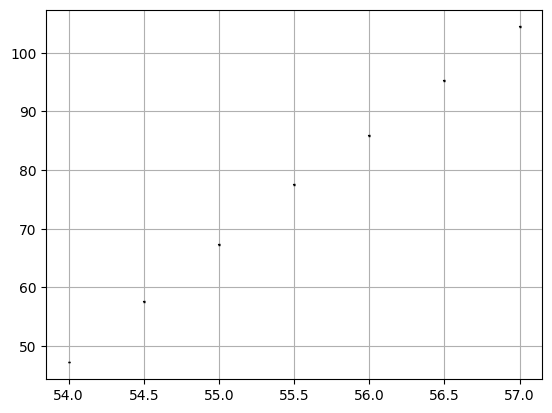

In [5]:
frequency_Vb_54 = np.mean(Vb_54[0:7])
err_Vb_54 = np.std(Vb_54[0:7])/np.sqrt(len(Vb_54[0:7]))

frequency_Vb_54_5 = np.mean(Vb_54_5[0:10])
err_Vb_54_5 = np.std(Vb_54_5[0:10])/np.sqrt(len(Vb_54_5[0:10]))

frequency_Vb_55 = np.mean(Vb_55[0:12])
err_Vb_55 = np.std(Vb_55[0:12])/np.sqrt(len(Vb_55[0:12]))

frequency_Vb_55_5 = np.mean(Vb_55_5[0:15])
err_Vb_55_5 = np.std(Vb_55_5[0:15])/np.sqrt(len(Vb_55_5[0:15]))

frequency_Vb_56 = np.mean(Vb_56[0:17])
err_Vb_56 = np.std(Vb_56[0:17])/np.sqrt(len(Vb_56[0:17]))

frequency_Vb_56_5 = np.mean(Vb_56_5[0:19])
err_Vb_56_5 = np.std(Vb_56_5[0:19])/np.sqrt(len(Vb_56_5[0:19]))

frequency_Vb_57 = np.mean(Vb_57[0:21])
err_Vb_57 = np.std(Vb_57[0:21])/np.sqrt(len(Vb_57[0:21]))

# nota: spesso l'ultimo punto del primo plateau lo scarto perchè non troppo in linea con gli altri

print(frequency_Vb_54, err_Vb_54)
print(frequency_Vb_54_5, err_Vb_54_5)
print(frequency_Vb_55, err_Vb_55)
print(frequency_Vb_55_5, err_Vb_55_5)
print(frequency_Vb_56, err_Vb_56)
print(frequency_Vb_56_5, err_Vb_56_5)
print(frequency_Vb_57, err_Vb_57)

V_bias = np.array([54, 54.5, 55, 55.5, 56, 56.5, 57])  #np.array([53.91, 54.42, 54.94, 55.45, 55.96, 56.47, 56.98])  
frequency = np.array([frequency_Vb_54, frequency_Vb_54_5, frequency_Vb_55, frequency_Vb_55_5, frequency_Vb_56, frequency_Vb_56_5, frequency_Vb_57])
err_frequency = np.array([err_Vb_54, err_Vb_54_5, err_Vb_55, err_Vb_55_5, err_Vb_56, err_Vb_56_5, err_Vb_57])

# plot the mean values with errors
fig, ax = plt.subplots()
ax.errorbar(V_bias, frequency, yerr=err_frequency, fmt='None', ecolor='black', capsize=1)
ax.grid(True)

In [6]:
import numpy as np
import jax
from iminuit import Minuit
from jax import grad
from scipy.stats import chi2

def line(x, m, q):
    return m*x + q

# tolto il primo perchè in offset
V_bias1 = V_bias
frequency1 = frequency
err_Vbias1 = np.ones(len(V_bias1)) * 0.0135 # 13.5mV di errore per variazioni di temperatura di 0.25°C (26.3°C a 26.8°C) (dV/dT = 54mV/°C CONSIGLIATA DA MANUALE)
err_frequency1 = err_frequency

jax.config.update("jax_enable_x64", True)

def model(x, m, q):
    return m*x + q

f_prime = jax.jit(grad(model))

@jax.jit
def cost(m, q):
    result = 0.0
    for xi, yi, x_erri, y_erri in zip(V_bias1, frequency1, err_Vbias1, err_frequency1):
        y_var = y_erri ** 2 + (f_prime(xi, m, q)*x_erri) ** 2
        result += (yi - model(xi, m, q)) ** 2 / y_var
    return result

cost.errordef = Minuit.LEAST_SQUARES

my_minuit = Minuit(cost,m=18,q=-900)
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)

# Calcolo del numero di gradi di libertà (ndof)
ndof = len(V_bias1) - 2

# Calcolo del p-value utilizzando la distribuzione chi-quadro
p_value = (1. - chi2.cdf(my_minuit.fval, df=ndof))

# Calcolo del chi-quadro ridotto
chi_reduced = my_minuit.fval / ndof

print(f"p-value: {p_value}")
print(f"chi-quadro ridotto: {chi_reduced}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.62                      │              Nfcn = 69               │
│ EDM = 2.08e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   19.0    │    0.1    │            │            │         │         │       │
│ 1 │ q    │   -978    │     6     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       m       q │
├───┼─────────────────┤
│ m │ 0.00987  -0.548 │
│ q │  -0.548    30.4 │
└───┴─────────────────┘

p-value: 1.1136306004577712e-05
chi-quadro ridotto: 6.1238534520289445


Text(0, 0.5, 'Dark Count Rate DCR $[kHz]$')

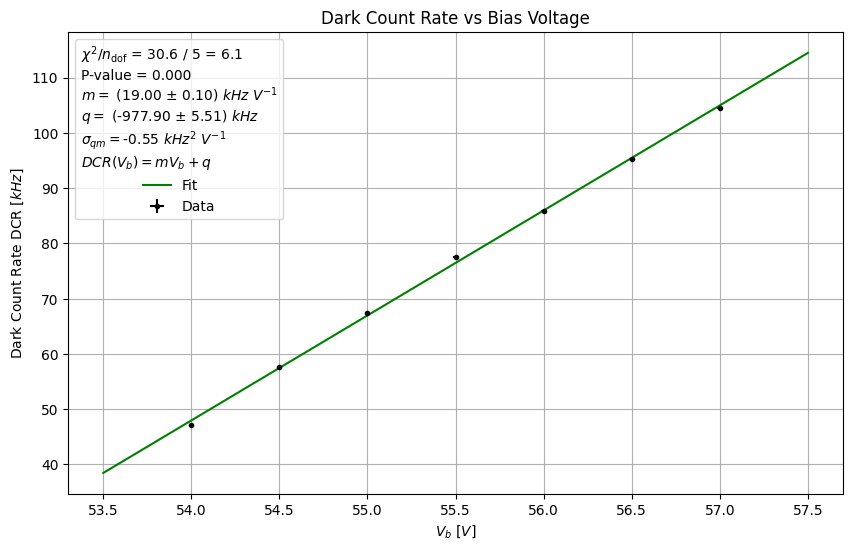

In [7]:
xaxis = np.linspace(53.5, 57.5, 10000)
plt.figure(figsize=(10,6))
plt.errorbar(V_bias1, frequency1, xerr= err_Vbias1, yerr=err_frequency1, fmt='.', ecolor='black', label='Data', color='black')
plt.plot(xaxis, line(xaxis, my_minuit.values['m'], my_minuit.values['q']), label='Fit', color='green')

fit_info = [f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fval:.1f} / {ndof:.0f} = {chi_reduced:.1f}",]
fit_info.append(f"P-value = {p_value:.3f}")
fit_info.append('$m = $ ({0:.2f} $\\pm$ {1:.2f})'.format(my_minuit.values['m'], my_minuit.errors['m']) + ' $kHz$ $V^{-1}$')
fit_info.append('$q = $ ({0:.2f} $\\pm$ {1:.2f})'.format(my_minuit.values['q'], my_minuit.errors['q']) + ' $kHz$')
fit_info.append('$\sigma_{qm} = $' + '{0:.2f}'.format(my_minuit.covariance[0][1]) + ' $kHz^2$ $V^{-1}$')
fit_info.append('$DCR(V_b) = mV_b + q$')
plt.legend(title="\n".join(fit_info), frameon=True)
plt.title('Dark Count Rate vs Bias Voltage')
plt.grid(True)
plt.xlabel('$V_{b}$ $[V]$')
plt.ylabel('Dark Count Rate DCR $[kHz]$')


In [8]:
# estrapolazione di V_breakdown
V_breakdown = -my_minuit.values['q']/my_minuit.values['m']
err_V_breakdown = np.sqrt((my_minuit.errors['q']/my_minuit.values['m'])**2 + (my_minuit.values['q']*my_minuit.errors['m']/my_minuit.values['m']**2)**2 + (my_minuit.values['q'] * my_minuit.covariance[0][1]/my_minuit.values['m']**3))
print(f'V_breakdown = {V_breakdown:.3f} ± {err_V_breakdown:.3f}')

V_breakdown = 51.475 ± 0.485


In [9]:
V_true = 51.96 # T = 25°C
t = abs(V_true - V_breakdown)/err_V_breakdown
print(f't = {t:.3f}')

t = 1.001


In [10]:
# costante di Boltzmann
k = 8.617333262145e-5 # eV/K
T = 26.55 + 273.15 # K

from jax import numpy as jnp

V_bias1 = V_bias
frequency1 = frequency
err_Vbias1 = np.ones(len(V_bias1)) * 0.0135 # 13.5mV di errore per variazioni di temperatura di 0.25°C (26.3°C a 26.8°C) (dV/dT = 54mV/°C CONSIGLIATA DA MANUALE)
err_frequency1 = err_frequency

def model(x, A, V_breakdown, E):
    return A*(x-V_breakdown)*(T/298)**(3/2)*jnp.exp(-(E/(2*k*T)-E/(2*k*298)))

f_prime = jax.jit(grad(model))

@jax.jit
def cost(A, V_breakdown, E):
    result = 0.0
    for xi, yi, x_erri, y_erri in zip(V_bias1, frequency1, err_Vbias1, err_frequency1):
        y_var = y_erri ** 2 + (f_prime(xi, A, V_breakdown, E)*x_erri) ** 2
        result += (yi - model(xi,A, V_breakdown, E)) ** 2 / y_var
    return result

cost.errordef = Minuit.LEAST_SQUARES

my_minuit = Minuit(cost,A=600,V_breakdown=51.9,E=1)
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)

# Calcolo del numero di gradi di libertà (ndof)
ndof = len(V_bias1) - 3

# Calcolo del p-value utilizzando la distribuzione chi-quadro
p_value = (1. - chi2.cdf(my_minuit.fval, df=ndof))

# Calcolo del chi-quadro ridotto
chi_reduced = my_minuit.fval / ndof

print(f"p-value: {p_value}")
print(f"chi-quadro ridotto: {chi_reduced}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.62                      │              Nfcn = 134              │
│ EDM = 3.49e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name        │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A           │    18     │    13     │            │            │         │         │       │
│ 1 │ V_breakdown │  51.475   │   0.022   │            │            │         │         │       │
│ 2 │ E           │     0     │     6     │            │            │         │         │       │
└───┴─────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────────┬─────────────────────────────────────┐
│             │           A V_breakdown           E │
├─────────────┼─────────────────────────────────────┤
│           A │         161      1.0e-3         -80 │
│ V_breakdown │      1.0e-3     0.00047      0.5e-3 │
│           E │         -80      0.5e-3        41.1 │
└─────────────┴─────────────────────────────────────┘

p-value: 3.6606188910104365e-06
chi-quadro ridotto: 7.654817162521392


E=0.448 ± 6.414 eV


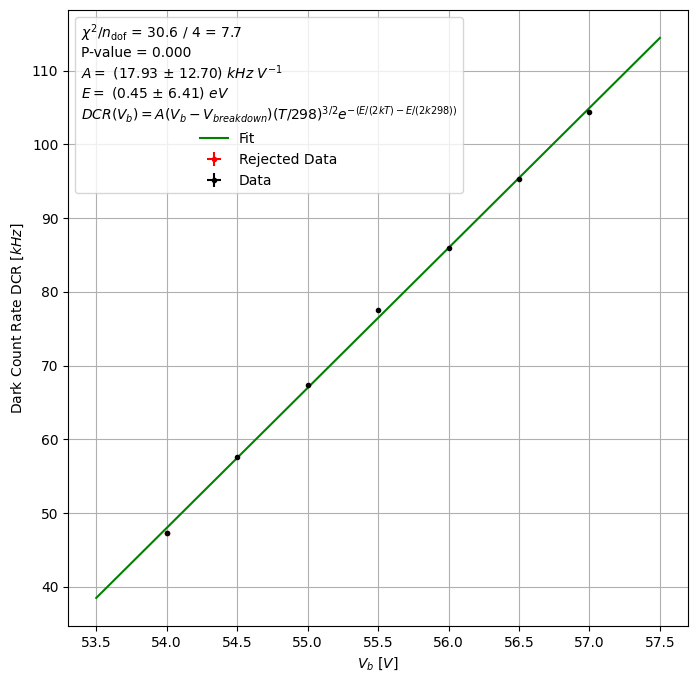

In [11]:
print(f'E={my_minuit.values["E"]:.3f} ± {my_minuit.errors["E"]:.3f} eV')

# plot
xaxis = np.linspace(53.5, 57.5, 10000)
plt.figure(figsize=(8,8))
plt.errorbar(V_bias[0], frequency[0], xerr= err_Vbias1[0], yerr=err_frequency[0], fmt='.', ecolor='red', label='Rejected Data', color='red')
plt.errorbar(V_bias1, frequency1, xerr= err_Vbias1, yerr=err_frequency1, fmt='.', ecolor='black', label='Data', color='black')
plt.plot(xaxis, model(xaxis, my_minuit.values['A'], my_minuit.values['V_breakdown'], my_minuit.values['E']), label='Fit', color='green')

fit_info = [f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fval:.1f} / {ndof:.0f} = {chi_reduced:.1f}",]
fit_info.append(f"P-value = {p_value:.3f}")
fit_info.append('$A = $ ({0:.2f} $\\pm$ {1:.2f})'.format(my_minuit.values['A'], my_minuit.errors['A']) + ' $kHz$ $V^{-1}$')
#fit_info.append('$V_{breakdown} = $ ({0:.2f} $\\pm$ {1:.2f})'.format(my_minuit.values['V_breakdown'], my_minuit.errors['V_breakdown']) + ' $V$')
fit_info.append('$E = $ ({0:.2f} $\\pm$ {1:.2f})'.format(my_minuit.values['E'], my_minuit.errors['E']) + ' $eV$')
fit_info.append('$DCR(V_b) = A(V_b-V_{breakdown})(T/298)^{3/2}e^{-(E/(2kT)-E/(2k298))}$')
plt.legend(title="\n".join(fit_info), frameon=True)
plt.grid(True)
plt.xlabel('$V_{b}$ $[V]$')
plt.ylabel('Dark Count Rate DCR $[kHz]$')

plt.show()